In [1]:
from math import *
import csv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as mpl
import matplotlib.dates as mdates
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import holoviews as hv
import numpy as np
import pandas as pd
import datetime
from gaussian import *
hv.notebook_extension()
%matplotlib inline

interval = 10
interval_size = 0.01

mpl.rcParams.update({'font.size':14})
mpl.rcParams['xtick.major.pad']='8'
mpl.rcParams['ytick.major.pad']='8'
mpl.rcParams['lines.linewidth'] = 4
plt.rc('text', usetex=True)

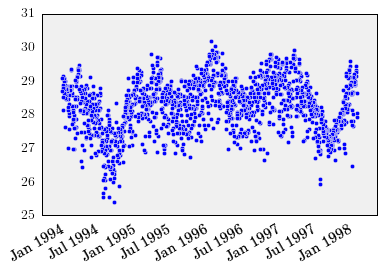

In [2]:
def difference(a,b,diff=0.05):
    if (abs(a-b)<0.05):
        return True
    else:
        return False

with open('data', 'rt') as f:
    reader = csv.reader(f)
    data = list(reader)

datadict = []
for entry in data:
    splitted = entry[0].split()
    try:
        datadict.append({'date':datetime.datetime(1900+int(splitted[1]),int(splitted[2]),int(splitted[3])), 'latitude':float(splitted[5]), 'longitude':float(splitted[6]), 'airtemp':float(splitted[10]), 'sstemp':float(splitted[11])})
    except:
        pass

datadict = sorted(datadict, key=lambda p: p['date'], reverse=True)
count = 0
x = []
y = []
z = []
samell = []
date = datadict[0]['date']
plt.close('all')
for i in range(0,len(datadict)):
    try:
        if (abs(datadict[i]['latitude']+5)<0.2 and abs(datadict[i]['longitude']-156) < 0.2):
            x.append(datadict[i]['date'])
            z.append(datadict[i]['airtemp'])

    except:
        pass
datadict[0].items()
x = x[:1480]
z = z[:1480]
fig,ax = plt.subplots()
ax.scatter(x,z)
ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
fig.autofmt_xdate()

plt.show()

In [3]:
import copy
a = copy.deepcopy(x[1479])

for i in range(0,len(x)):
    x[i] = (x[i]-a).days
    
x = x[::-1]
z = z[::-1]

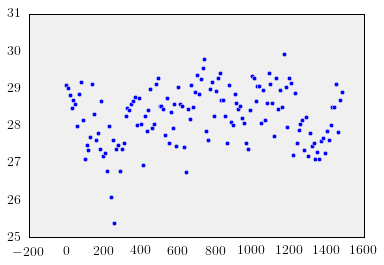

In [4]:
sample_x = np.asarray(x[0:1480:10])
sample_y = np.asarray(z[0:1480:10])
sample_y
plt.scatter(sample_x,sample_y)

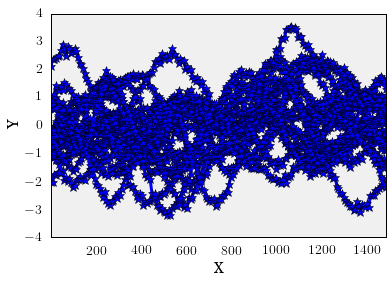

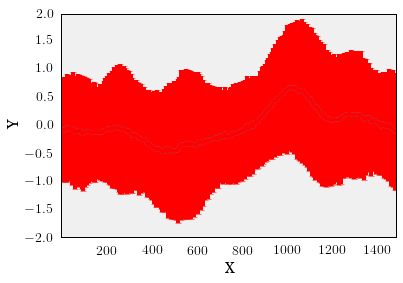

In [5]:
samples = 20
ndim =200
length = 1480
sigma_v = 0.1
l=100
sigma_f=1
uniform=False


dots=True
usecolors=False
lw=3
xname="X"
yname="Y"
ylim=30
filename="presentation5"

x,y,cov = genGP(samples=samples, ndim=ndim, length=length, sigma_v=sigma_v, l=l, sigma_f=sigma_f, uniform=uniform, dots=dots, lw=lw, xname=xname, yname=yname, usecolors=usecolors, filename=filename)

In [6]:
mu,cov = inference(sample_x, sample_y, x, cov, ndim=ndim, length=length, sigma_v=sigma_v, l=l, sigma_f=sigma_f)

In [7]:
data = np.array((sample_x,sample_y))

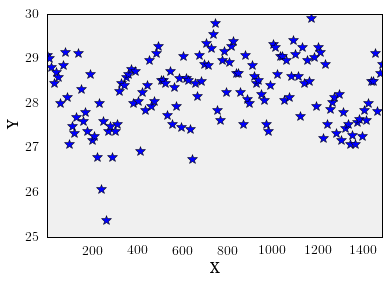

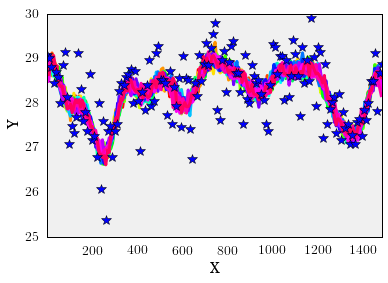

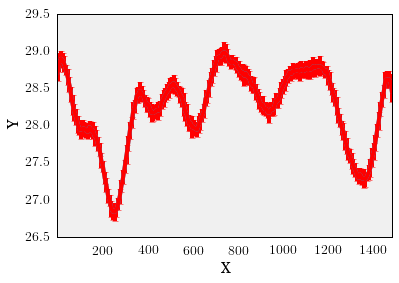

In [8]:
y=np.random.multivariate_normal(mu, cov, samples).T
plotGP(x,y,xlim=length,data=data,filename="presentation")
